# <center> Machine Learning Project - Predicting Housing Prices </center>

## Introduction

### Background
Housing price is a topic of interest for almost anyone. Being able to accurately predict how much a house can be sold for is of practical importance for homeowners, house hunters and real-estate brokerage firms. With platforms such as Zillow, Redfin, and Compass, the real-estate business has become increasingly more data and technology driven. Domain knowledge from agents are still extremely valuable, yet with the power of rich data and machine learning algorithms, you don’t have to be an expert to accurately predict a house’s selling price.

In this project, I predicted housing prices based on given compenents with the use of feature selection/egineering and machine learning modeling. I then also determined the most important compenents that contribute to the price of an individual house.


### Dataset
The dataset provided from Kaggle, [House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques), contains explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa
from 2006 to 2010. There are a total of 1460 homes and 79 features that will serve as the predictors for `SalePrice`, the property's sale price in dollars. The features are as follows:
- **MSSubClass**: The building class
- **MSZoning**: The general zoning classification
- **LotFrontage**: Linear feet of street connected to property
- **LotArea**: Lot size in square feet
- **Street**: Type of road access
- **Alley**: Type of alley access
- **LotShape**: General shape of property
- **LandContour**: Flatness of the property
- **Utilities**: Type of utilities available
- **LotConfig**: Lot configuration
- **LandSlope**: Slope of property
- **Neighborhood**: Physical locations within Ames city limits
- **Condition1**: Proximity to main road or railroad
- **Condition2**: Proximity to main road or railroad (if a second is present)
- **BldgType**: Type of dwelling
- **HouseStyle**: Style of dwelling
- **OverallQual**: Overall material and finish quality
- **OverallCond**: Overall condition rating
- **YearBuilt**: Original construction date
- **YearRemodAdd**: Remodel date
- **RoofStyle**: Type of roof
- **RoofMatl**: Roof material
- **Exterior1st**: Exterior covering on house
- **Exterior2nd**: Exterior covering on house (if more than one material)
- **MasVnrType**: Masonry veneer type
- **MasVnrArea**: Masonry veneer area in square feet
- **ExterQual**: Exterior material quality
- **ExterCond**: Present condition of the material on the exterior
- **Foundation**: Type of foundation
- **BsmtQual**: Height of the basement
- **BsmtCond**: General condition of the basement
- **BsmtExposure**: Walkout or garden level basement walls
- **BsmtFinType1**: Quality of basement finished area
- **BsmtFinSF1**: Type 1 finished square feet
- **BsmtFinType2**: Quality of second finished area (if present)
- **BsmtFinSF2**: Type 2 finished square feet
- **BsmtUnfSF**: Unfinished square feet of basement area
- **TotalBsmtSF**: Total square feet of basement area
- **Heating**: Type of heating
- **HeatingQC**: Heating quality and condition
- **CentralAir**: Central air conditioning
- **Electrical**: Electrical system
- **1stFlrSF**: First Floor square feet
- **2ndFlrSF**: Second floor square feet
- **LowQualFinSF**: Low quality finished square feet (all floors)
- **GrLivArea**: Above grade (ground) living area square feet
- **BsmtFullBath**: Basement full bathrooms
- **BsmtHalfBath**: Basement half bathrooms
- **FullBath**: Full bathrooms above grade
- **HalfBath**: Half baths above grade
- **Bedroom**: Number of bedrooms above basement level
- **Kitchen**: Number of kitchens
- **KitchenQual**: Kitchen quality
- **TotRmsAbvGrd**: Total rooms above grade (does not include bathrooms)
- **Functional**: Home functionality rating
- **Fireplaces**: Number of fireplaces
- **FireplaceQu**: Fireplace quality
- **GarageType**: Garage location
- **GarageYrBlt**: Year garage was built
- **GarageFinish**: Interior finish of the garage
- **GarageCars**: Size of garage in car capacity
- **GarageArea**: Size of garage in square feet
- **GarageQual**: Garage quality
- **GarageCond**: Garage condition
- **PavedDrive**: Paved driveway
- **WoodDeckSF**: Wood deck area in square feet
- **OpenPorchSF**: Open porch area in square feet
- **EnclosedPorch**: Enclosed porch area in square feet
- **3SsnPorch**: Three season porch area in square feet
- **ScreenPorch**: Screen porch area in square feet
- **PoolArea**: Pool area in square feet
- **PoolQC**: Pool quality
- **Fence**: Fence quality
- **MiscFeature**: Miscellaneous feature not covered in other categories
- **MiscVal**: Value of miscellaneous feature
- **MoSold**: Month Sold
- **YrSold**: Year Sold
- **SaleType**: Type of sale
- **SaleCondition**: Condition of sale

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import norm, skew
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

train = pd.read_csv('train.csv', index_col = 'Id')

## I. Exploratory Data Analysis

In [3]:
train.shape

(1460, 80)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [5]:
train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
categorical = [x for x in train.columns if train.dtypes[x] == 'object']

for feat in categorical:
    print (train[feat].value_counts())
    print ('\n')

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64


Pave    1454
Grvl       6
Name: Street, dtype: int64


Grvl    50
Pave    41
Name: Alley, dtype: int64


Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64


Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64


AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64


Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64


Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64


NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neig

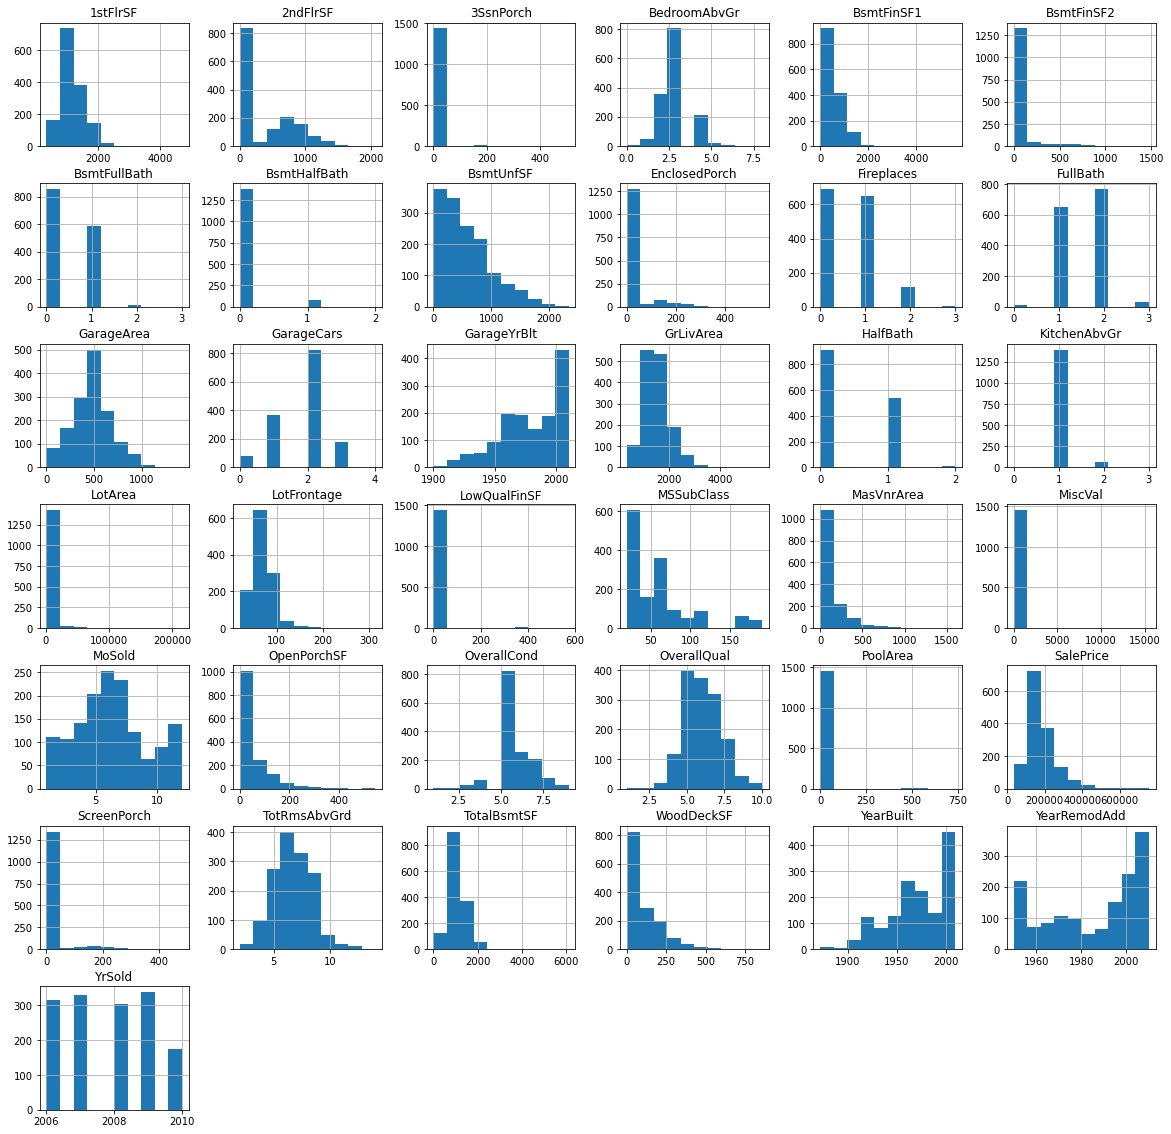

In [7]:
train.hist(figsize = (20, 20));

### Target Feature - Sale Price
For the target feature, `SalePrice`, there was deviation from normal distribution and a positive skewness. Log transformation was thus applied so it can follow Gaussian distribution.

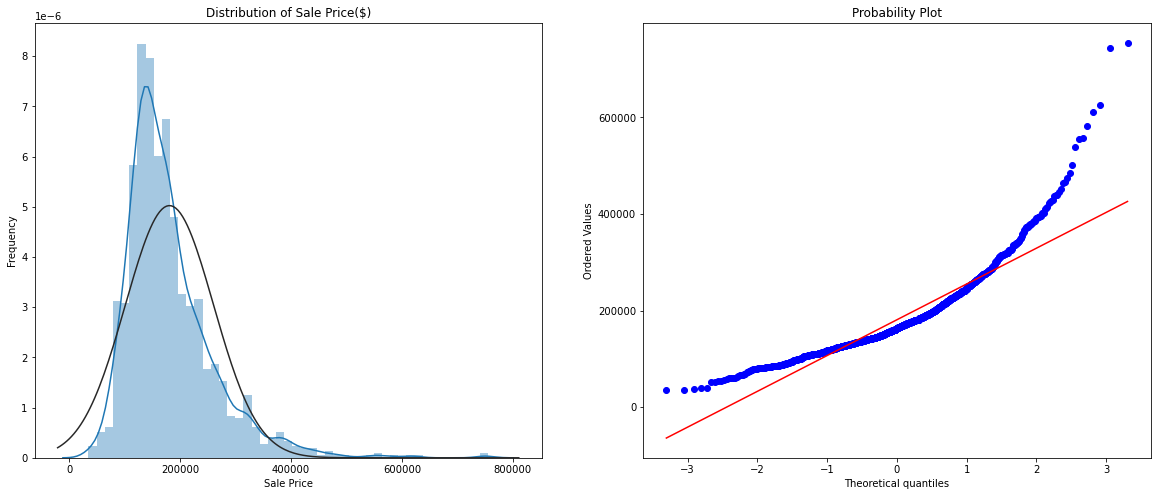

In [8]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20, 8))
sns.distplot(train['SalePrice'], fit=norm, ax=ax1)
ax1.set_xlabel("Sale Price")
ax1.set_ylabel("Frequency")
ax1.set_title("Distribution of Sale Price($)")

stats.probplot(train['SalePrice'], plot=plt)

plt.show()

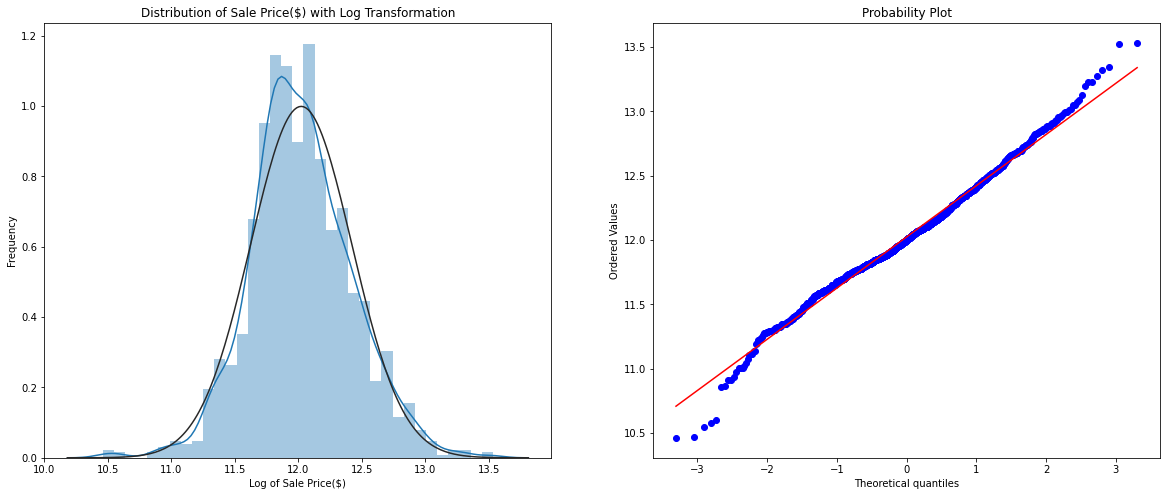

In [9]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20, 8))
sns.distplot(np.log1p(train['SalePrice']), fit=norm, ax=ax1)
ax1.set_xlabel("Log of Sale Price($)")
ax1.set_ylabel("Frequency")
ax1.set_title("Distribution of Sale Price($) with Log Transformation")

stats.probplot(np.log(train['SalePrice']), plot=plt)

plt.show()

In [3]:
train['SalePrice'] = np.log1p(train['SalePrice'])

### Missing Variables
I observed the dataset for missingness and decided how to handle them based on the percentage of missingness percentage and what type of missingness - missing completely at random, missing at random, and missing not at random.

In [11]:
total = train.isnull().sum(axis=0).sort_values(ascending=False)
percent = (train.isnull().sum(axis=0)/train.isnull().count(axis=0)).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys = ['Total', 'Percent'])
missing_data[missing_data.Total>0]

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageType,81,0.055479
GarageCond,81,0.055479
GarageFinish,81,0.055479
GarageQual,81,0.055479


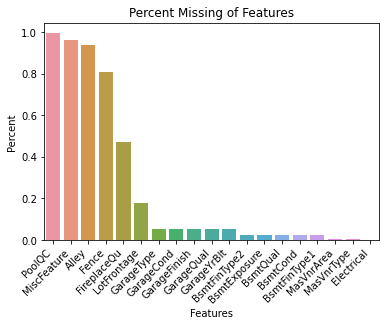

In [12]:
missing_data_ = missing_data[missing_data.Total>0]
ax = sns.barplot(missing_data_.index, missing_data_['Percent'])
plt.xlabel('Features')
plt.ylabel('Percent')
plt.title('Percent Missing of Features')
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right');

#### Imputing Missing Variables
`PoolQC`, `MiscFeature`, `Alley`, `Fence` had over 80% missing data, I decided to remove these features as this is a high number of missingness and I believe these features do not add much to the model. 

In [4]:
train.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis=1, inplace=True)

Those without any fireplace did not have a fireplace quality attribute thus `FireplaceQu` was imputed with N/A.

In [21]:
train.loc[(train['Fireplaces'] != 0) & (train['FireplaceQu'].isnull())]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [5]:
train["FireplaceQu"] = train["FireplaceQu"].fillna("NA")

For `LotFrontage`, I imputed missing values based off of the median grouped by `Neighborhood`. 

In [6]:
train["LotFrontage"].fillna(train.groupby("Neighborhood")["LotFrontage"].transform("median"), inplace=True)

The `Garage` variables correspond to houses without garages so they were imputed respectively.

In [24]:
train.loc[train['GarageCond'].isnull()][['GarageCars', 'GarageArea', 'GarageCond', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual']]

,GarageCars,GarageArea,GarageCond,GarageType,GarageYrBlt,GarageFinish,GarageQual
Id,,,,,,,
40,0,0,NaN,NaN,NaN,NaN,NaN
49,0,0,NaN,NaN,NaN,NaN,NaN
79,0,0,NaN,NaN,NaN,NaN,NaN
89,0,0,NaN,NaN,NaN,NaN,NaN
90,0,0,NaN,NaN,NaN,NaN,NaN
100,0,0,NaN,NaN,NaN,NaN,NaN
109,0,0,NaN,NaN,NaN,NaN,NaN
126,0,0,NaN,NaN,NaN,NaN,NaN
128,0,0,NaN,NaN,NaN,NaN,NaN


In [7]:
train['GarageCond'] = train['GarageCond'].fillna("NA")
train['GarageType'] = train['GarageType'].fillna("None")
train['GarageYrBlt'] = train['GarageYrBlt'].fillna(0)
train['GarageFinish'] = train['GarageFinish'].fillna("None")
train['GarageQual'] = train['GarageQual'].fillna("NA")

The same imputation method for garage features was then carried out for `Bsmt` features, except for the house at index 949 in which `BsmtExposure` was imputed as "No".

In [26]:
train.loc[train['BsmtExposure'].isnull()][['BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtCond', 'BsmtQual']]

,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtCond,BsmtQual
Id,,,,,
18,NaN,NaN,NaN,NaN,NaN
40,NaN,NaN,NaN,NaN,NaN
91,NaN,NaN,NaN,NaN,NaN
103,NaN,NaN,NaN,NaN,NaN
157,NaN,NaN,NaN,NaN,NaN
183,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN
343,NaN,NaN,NaN,NaN,NaN
363,NaN,NaN,NaN,NaN,NaN


In [8]:
train.at[949, 'BsmtExposure'] = 'No'

In [9]:
train['BsmtExposure'] = train['BsmtExposure'].fillna('None')
train['BsmtFinType2'] = train['BsmtFinType2'].fillna('None')
train['BsmtFinType1'] = train['BsmtFinType1'].fillna('None')
train['BsmtCond'] = train['BsmtCond'].fillna("NA")
train['BsmtQual'] = train['BsmtQual'].fillna("NA")

Masonry veneer features were also imputed has of having none.

In [29]:
train.loc[train['MasVnrArea'].isnull()][['MasVnrArea', 'MasVnrType']]

,MasVnrArea,MasVnrType
Id,,
235,NaN,NaN
530,NaN,NaN
651,NaN,NaN
937,NaN,NaN
974,NaN,NaN
978,NaN,NaN
1244,NaN,NaN
1279,NaN,NaN


In [10]:
train['MasVnrArea'] = train['MasVnrArea'].fillna(0)
train['MasVnrType'] = train['MasVnrType'].fillna("None")

The one missing value for `Electrical` was imputed with the most occuring electrical system.

In [11]:
train['Electrical'] = train['Electrical'].fillna(train['Electrical'].mode()[0])

In [12]:
train.isnull().any().sum()

0

### Outliers
I observed for outliers in the dataset as indicated in http://jse.amstat.org/v19n3/decock.pdf. From the graph of `SalePrice` vs. `GrLivArea`, there appears to be two observations that appear as outliers. Analyzing these two observations, they are partial Sales that likely don’t represent actual market values, thus can be removed.

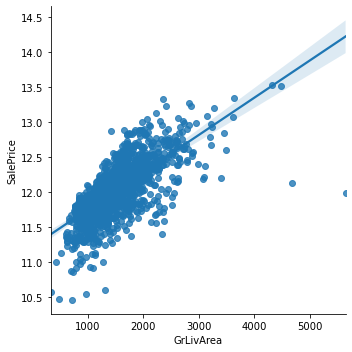

In [14]:
sns.lmplot(x = "GrLivArea", y = "SalePrice", data=train)
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()

In [33]:
train[train['GrLivArea'] > 4500]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
524,60,RL,130.0,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260,Unf,0,878,3138,GasA,Ex,Y,SBrkr,3138,1538,0,4676,1,0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,2007.0,Fin,3,884,TA,TA,Y,208,406,0,0,0,0,0,10,2007,New,Partial,12.126764
1299,60,RL,313.0,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,0,1,2008,New,Partial,11.982935


In [13]:
train = train[train.GrLivArea < 4500]

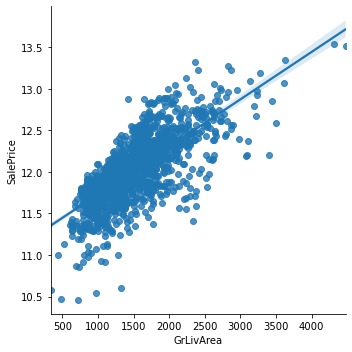

In [35]:
sns.lmplot(x = "GrLivArea", y = "SalePrice", data=train)
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()

## II. Feature Engineering

Nominal categorical features that were of numeric type, `MSSubClass` and `MoSold`, were converted to categories, and ordinal categorical features that were not of numeric type were label encoded to preserve the order of the values and to reduce dimensionality during the dummification process.

In [14]:
train['MSSubClass'] = train['MSSubClass'].astype('str')
train['MoSold'] = train['MoSold'].astype('str')

In [15]:
ord_feat_replace = ['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC', 
                    'KitchenQual','FireplaceQu','GarageQual','GarageCond']
train[ord_feat_replace] = train[ord_feat_replace].replace({"Ex" : 5, "Gd" : 4, "TA" : 3, "Fa" : 2, "Po" : 1, "NA" : 0})


To also increase predictor strength and reduce multicollinearity, new features were engineered from existing features, including 
- `TotalSF` = `TotalBsmtSF` + `GrLivArea`
- `TotalBath` =  `FullBath` + `BsmtFullBath` + 0.5*`HalfBath` + 0.5*`BsmtHalfBath`
- `TotalPorchSF` = `OpenPorchSF` + `EnclosedPorch` + `3SsnPorch` + `ScreenPorch`

Some existing features were also replaced with new features that hopefully provided more predictive power:
- `PoolArea` replaced with if there is a pool or not, `HasPool`
- `MiscVal` replaced with if there is miscellaneous features or not, `HasMiscFeat`
- `GarageYrBuilt` replaced with if there is a garage or not and the age of the garage, `HasGarage` and `GarageAge`
- `YearRemodAdd` replaced with if the house was remodeled or not and the age of the remodel, `Remodeled` and `RemodeledAge`

In [16]:
#total SF for house
train['TotalSF'] = train['TotalBsmtSF'] + train['GrLivArea']
train.drop(columns = ['TotalBsmtSF', 'GrLivArea'], axis=1, inplace = True)

#TotalBsmtSF = BsmtFinSF1 + BsmtFinSF2 + BsmtUnfSF
train.drop(columns = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF'], axis=1, inplace = True)

#GrLivArea = 1stFlrSF + 2ndFlrSF + LowQualFinSF
train.drop(columns = ['1stFlrSF', '2ndFlrSF', 'LowQualFinSF'], axis=1, inplace=True)

#Total number of bathrooms
train['TotalBath'] = train['FullBath'] + train['BsmtFullBath'] + .5*(train['HalfBath'] + train['BsmtHalfBath'])
train.drop(columns = ['FullBath', 'BsmtFullBath', 'HalfBath', 'BsmtHalfBath'], axis=1, inplace = True)

#total SF of porch
train['TotalPorchSF'] = train['OpenPorchSF'] + train['EnclosedPorch'] + train['3SsnPorch'] + train['ScreenPorch']
train.drop(columns = ['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch'], axis = 1, inplace = True)

#only one observation different
del train['Utilities']

#new feature for Pool
train['HasPool'] = [1 if x == True else 0 for x in train['PoolArea'] > 1]
del train['PoolArea']

#new feature for MiscFeat
train['HasMiscFeat'] = [1 if x == True else 0 for x in train['MiscVal'] > 1]
del train['MiscVal']

#new feature for Garage
train['HasGarage'] = [0 if x == True else 1 for x in train['GarageYrBlt'] == 'None']
train['GarageAge'] = train['GarageYrBlt'] - train['YearBuilt']
train.loc[train['GarageAge'] < 0, 'GarageAge'] = 0
train['GarageAge'] = train['GarageAge'].fillna(0)
del train['GarageYrBlt']

#new feature for Remodel
train['Remodeled'] = [0 if x == True else 1 for x in train['YearRemodAdd'] == train['YearBuilt']]
train['RemodelAge'] = train['YearRemodAdd'] - train['YearBuilt']
del train['YearRemodAdd']

### Dummifying Nominal Categorical Features
Categorical features were dummified for compatibility with models used. 

In [19]:
cat_var= train.loc[:, train.dtypes==object].copy()
cat_var = pd.get_dummies(cat_var, drop_first=True)
cat_var.sample(5)

,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,MoSold_10,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
725,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1093,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,

In [20]:
num_var = train.loc[:, train.dtypes!=object].copy()
num_var.drop(columns = ['SalePrice'], inplace=True)
num_var.sample(5)

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,YrSold,TotalSF,TotalBath,TotalPorchSF,HasPool,HasMiscFeat,HasGarage,GarageAge,Remodeled,RemodelAge
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1226,65.0,10482,6,8,1958,63.0,3,4,3,3,5,3,1,3,6,0,0,1,264,3,3,224,2007,1726,1.5,0,0,0,1,0.0,0,0
1349,66.5,16196,7,5,1998,0.0,4,3,4,3,5,3,1,4,5,1,2,2,514,3,3,402,2007,2976,3.0,25,0,0,1,0.0,0,0
564,66.0,21780,6,7,1918,0.0,3,3,4,3,5,4,1,3,8,1,4,2,396,3,3,72,2008,2837,2.0,180,0,0,1,37.0,1,32
476,80.0,8480,5,6,1963,0.0,3,3,3,3,3,2,1,3,5,0,0,2,624,3,3,0,2007,1940,2.0,216,0,0,1,33.0,0,0
101,80.0,10603,6,7,1977,28.0,3,3,3,3,4,3,1,4,6,2,3,2,480,3,3,168,2010,3220,3.0,68,0,0,1,0.0,1,24


In [21]:
housing = pd.concat([cat_var, num_var], axis=1)
housing.sample(5)

,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,MoSold_10,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,YrSold,TotalSF,TotalBath,TotalPorchSF,HasPool,HasMiscFeat,HasGarage,GarageAge,Remodeled,RemodelAge
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
662,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,

In [22]:
target = train.SalePrice
target.shape

(1458,)

In [23]:
housing.shape

(1458, 228)

## III. Modelling

### Creating Test/Train Set

In [24]:
from sklearn.model_selection import train_test_split,KFold,cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.metrics import mean_squared_error,accuracy_score, r2_score, confusion_matrix

def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [25]:
X_train, X_test, y_train, y_test = train_test_split(housing, target, test_size=0.2, random_state=42)

In [26]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1166, 228)
(1166,)
(292, 228)
(292,)


### Standardize Features
All features were standardized prior to model fitting.

In [140]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [141]:
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

### Lasso

In [94]:
from sklearn.linear_model import Lasso

In [73]:
alphas = np.linspace(1e-5, 1e-2, 100)
params_lasso = [{'alpha':alphas, 'max_iter': [2000]}]
kf5 = KFold(n_splits = 5, shuffle = True, random_state = 42)
grid_lasso = GridSearchCV(estimator = Lasso(normalize=False), param_grid = params_lasso, cv = kf5, return_train_score = True)
grid_lasso.fit(X_train_std, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Lasso(),
             param_grid=[{'alpha': array([1.00000000e-05, 1.10909091e-04, 2.11818182e-04, 3.12727273e-04,
       4.13636364e-04, 5.14545455e-04, 6.15454545e-04, 7.16363636e-04,
       8.17272727e-04, 9.18181818e-04, 1.01909091e-03, 1.12000000e-03,
       1.22090909e-03, 1.32181818e-03, 1.42272727e-03, 1.52363636e-03,
       1...
       7.67909091e-03, 7.78000000e-03, 7.88090909e-03, 7.98181818e-03,
       8.08272727e-03, 8.18363636e-03, 8.28454545e-03, 8.38545455e-03,
       8.48636364e-03, 8.58727273e-03, 8.68818182e-03, 8.78909091e-03,
       8.89000000e-03, 8.99090909e-03, 9.09181818e-03, 9.19272727e-03,
       9.29363636e-03, 9.39454545e-03, 9.49545455e-03, 9.59636364e-03,
       9.69727273e-03, 9.79818182e-03, 9.89909091e-03, 1.00000000e-02]),
                          'max_iter': [2000]}],
             return_train_score=True)

In [74]:
print('Best params: {}'.format(grid_lasso.best_params_))
print('Best score : {}'.format(grid_lasso.best_score_))

Best params: {'alpha': 0.0038445454545454547, 'max_iter': 2000}
Best score : 0.9128340255094309


In [75]:
lasso_model = grid_lasso.best_estimator_
print("RMSE train: {}".format(rmse(y_train, lasso_model.predict(X_train_std))))
print("RMSE test : {}".format(rmse(y_test,  lasso_model.predict(X_test_std))))

RMSE train: 0.1028800302104777
RMSE test : 0.12666532123166746


Text(0.5, 1.0, 'Coefficients in the Lasso Model')

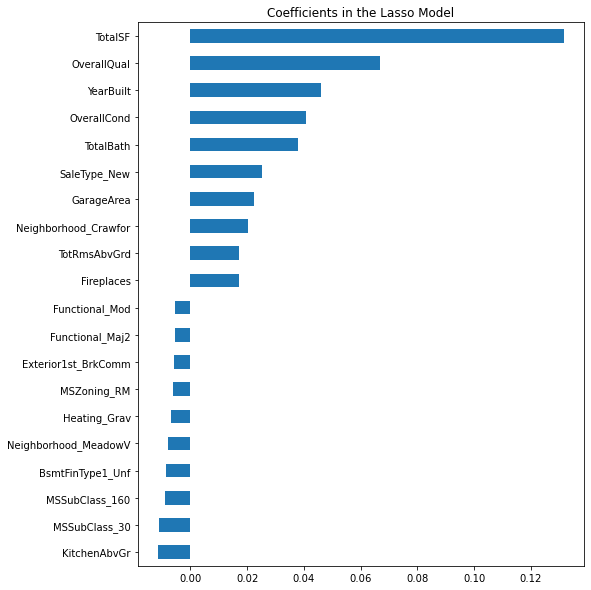

In [156]:
coef = pd.Series(lasso_model.coef_, index = X_train.columns)
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

### Ridge

In [149]:
from sklearn.linear_model import Ridge
alphas = np.logspace(-4, 4, 100)
params_ridge = [{'alpha':alphas, 'max_iter': [2000]}]
kf5 = KFold(n_splits = 5, shuffle = True, random_state = 42)
grid_ridge = GridSearchCV(estimator = Ridge(normalize=False), param_grid = params_ridge, cv = kf5, return_train_score = True)
grid_ridge.fit(X_train_std, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Ridge(),
             param_grid=[{'alpha': array([1.00000000e-04, 1.20450354e-04, 1.45082878e-04, 1.74752840e-04,
       2.10490414e-04, 2.53536449e-04, 3.05385551e-04, 3.67837977e-04,
       4.43062146e-04, 5.33669923e-04, 6.42807312e-04, 7.74263683e-04,
       9.32603347e-04, 1.12332403e-03, 1.35304777e-03, 1.62975083e-03,
       1...
       1.38488637e+02, 1.66810054e+02, 2.00923300e+02, 2.42012826e+02,
       2.91505306e+02, 3.51119173e+02, 4.22924287e+02, 5.09413801e+02,
       6.13590727e+02, 7.39072203e+02, 8.90215085e+02, 1.07226722e+03,
       1.29154967e+03, 1.55567614e+03, 1.87381742e+03, 2.25701972e+03,
       2.71858824e+03, 3.27454916e+03, 3.94420606e+03, 4.75081016e+03,
       5.72236766e+03, 6.89261210e+03, 8.30217568e+03, 1.00000000e+04]),
                          'max_iter': [2000]}],
             return_train_score=True)

In [150]:
print('Best params: {}'.format(grid_ridge.best_params_))
print('Best score : {}'.format(grid_ridge.best_score_))

Best params: {'alpha': 166.81005372000593, 'max_iter': 2000}
Best score : 0.9032944688438036


In [151]:
ridge_model = grid_ridge.best_estimator_
print("RMSE train: {}".format(rmse(y_train, ridge_model.predict(X_train_std))))
print("RMSE test : {}".format(rmse(y_test,  ridge_model.predict(X_test_std))))

RMSE train: 0.09778176657698567
RMSE test : 0.13557283716162086


Text(0.5, 1.0, 'Coefficients in the Ridge Model')

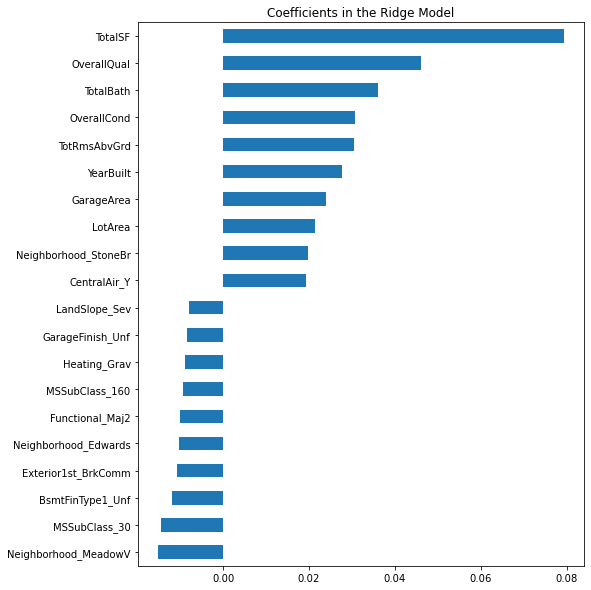

In [157]:
coef2 = pd.Series(ridge_model.coef_, index = X_train.columns)
imp_coef2 = pd.concat([coef2.sort_values().head(10),
                     coef2.sort_values().tail(10)])
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef2.plot(kind = "barh")
plt.title("Coefficients in the Ridge Model")

### Elastic Net

In [102]:
from sklearn.linear_model import ElasticNet
params_elastic = [{
        'alpha' : np.linspace(1e-4, 1e-1, 100),
        'l1_ratio' : np.arange(0,1.02,0.02),
        'random_state': [42]
        }]

kf5 = KFold(n_splits = 5, shuffle = True, random_state = 42)
grid_elastic = GridSearchCV(estimator = ElasticNet(normalize=False), param_grid = params_elastic, cv = kf5, return_train_score = True)
grid_elastic.fit(X_train_std, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=ElasticNet(),
             param_grid=[{'alpha': array([0.0001    , 0.00110909, 0.00211818, 0.00312727, 0.00413636,
       0.00514545, 0.00615455, 0.00716364, 0.00817273, 0.00918182,
       0.01019091, 0.0112    , 0.01220909, 0.01321818, 0.01422727,
       0.01523636, 0.01624545, 0.01725455, 0.01826364, 0.01927273,
       0.02028182, 0.02129091, 0....
       0.09596364, 0.09697273, 0.09798182, 0.09899091, 0.1       ]),
                          'l1_ratio': array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
       0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
       0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
       0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
       0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
                          'random_state': [42]}],
             return_train_score=True)

In [104]:
print('Best params: {}'.format(grid_elastic.best_params_))
print('Best score : {}'.format(grid_elastic.best_score_))

Best params: {'alpha': 0.004136363636363637, 'l1_ratio': 0.9400000000000001, 'random_state': 42}
Best score : 0.9128406253190283


In [105]:
elastic_model = grid_elastic.best_estimator_
print("RMSE train: {}".format(rmse(y_train, elastic_model.predict(X_train_std))))
print("RMSE test : {}".format(rmse(y_test,  elastic_model.predict(X_test_std))))

RMSE train: 0.10297750343967497
RMSE test : 0.12669826333450526


Text(0.5, 1.0, 'Coefficients in the Elastic Net Model')

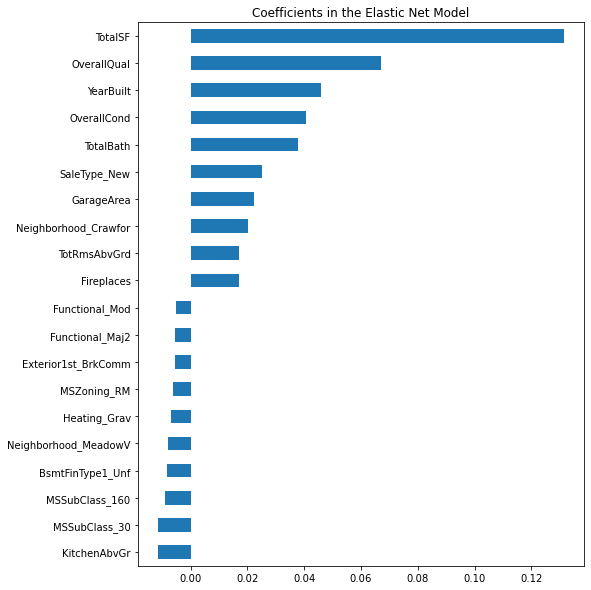

In [159]:
coef3 = pd.Series(elastic_model.coef_, index = X_train.columns)
imp_coef3 = pd.concat([coef3.sort_values().head(10),
                     coef3.sort_values().tail(10)])
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef3.plot(kind = "barh")
plt.title("Coefficients in the Elastic Net Model")

### Random Forest

In [48]:
from sklearn.ensemble import RandomForestRegressor

In [58]:
p_test = {'n_estimators':[10,30,50,70,90,110,130,150,170,190] }

tuning = GridSearchCV(estimator =RandomForestRegressor(max_features='auto', 
                      min_samples_split=2, min_samples_leaf=1, 
                      n_jobs=-1, random_state=42, verbose=0, 
                      warm_start=False), param_grid = p_test, n_jobs=-1, cv=5)
tuning.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'n_estimators': [10, 30, 50, 70, 90, 110, 130, 150,
                                          170, 190]})

In [59]:
tuning.best_params_, tuning.best_score_

({'n_estimators': 130}, 0.8745649570944953)

In [64]:
p_test2 = {'max_features':[40,60,80,100,120,140,160]}

tuning = GridSearchCV(estimator =RandomForestRegressor(n_estimators= 130,
                      min_samples_split=2, min_samples_leaf=1, 
                      n_jobs=-1, random_state=42, verbose=0, 
                      warm_start=False), param_grid = p_test2, n_jobs=-1, cv=5)
tuning.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(n_estimators=130, n_jobs=-1,
                                             random_state=42),
             n_jobs=-1,
             param_grid={'max_features': [40, 60, 80, 100, 120, 140, 160]})

In [65]:
tuning.best_params_, tuning.best_score_

({'max_features': 80}, 0.8860719732070477)

In [66]:
p_test8 = [{"min_samples_split":range(5, 41, 3), "min_samples_leaf":range(1,6)}]
tuning = GridSearchCV(estimator =RandomForestRegressor(n_estimators= 130,
                      max_features=80, n_jobs=-1, random_state=42, verbose=0, 
                      warm_start=False), param_grid = p_test8, n_jobs=-1, cv=5)
tuning.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_features=80, n_estimators=130,
                                             n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid=[{'min_samples_leaf': range(1, 6),
                          'min_samples_split': range(5, 41, 3)}])

In [67]:
tuning.best_params_, tuning.best_score_

({'min_samples_leaf': 1, 'min_samples_split': 5}, 0.8859218724610098)

In [68]:
grid_param = [{}]
rf = GridSearchCV(estimator = RandomForestRegressor(
                                    max_features=80,\
                                    n_estimators=130,\
                                    min_samples_split=5,\
                                    min_samples_leaf=1,\
                                    random_state=42,\
                                    n_jobs=-1, verbose=0, warm_start=False),\
                  param_grid = grid_param, n_jobs=-1, cv=5)  

rf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_features=80,
                                             min_samples_split=5,
                                             n_estimators=130, n_jobs=-1,
                                             random_state=42),
             n_jobs=-1, param_grid=[{}])

In [69]:
print('Best score : {}'.format(rf.best_score_))

Best score : 0.8859218724610101


In [70]:
rf_model = rf.best_estimator_
print("RMSE train: {}".format(rmse(y_train, rf_model.predict(X_train))))
print("RMSE test : {}".format(rmse(y_test,  rf_model.predict(X_test))))

RMSE train: 0.05957224728842917
RMSE test : 0.14257320801487056


### Gradient Boosting

#### Parameter Tuning
- learning rate

In [27]:
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor()

p_test3 = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 'n_estimators':[100,250,500,750,1000,1250,1500,1750]}
tuning = GridSearchCV(estimator =GradientBoostingRegressor(max_depth=4, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=42), 
            param_grid = p_test3, n_jobs=4,iid=False, cv=5)
tuning.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingRegressor(max_depth=4,
                                                 max_features='sqrt',
                                                 random_state=42, subsample=1),
             iid=False, n_jobs=4,
             param_grid={'learning_rate': [0.15, 0.1, 0.05, 0.01, 0.005, 0.001],
                         'n_estimators': [100, 250, 500, 750, 1000, 1250, 1500,
                                          1750]})

In [28]:
tuning.best_params_, tuning.best_score_

({'learning_rate': 0.01, 'n_estimators': 1750}, 0.9069695522805901)

- max depth

In [137]:
p_test2 = {'max_depth':[2,3,4,5,6,7] }
tuning = GridSearchCV(estimator =GradientBoostingRegressor(learning_rate=0.01,n_estimators=1750, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=42), 
            param_grid = p_test2, n_jobs=4,iid=False, cv=5)
tuning.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingRegressor(learning_rate=0.01,
                                                 max_features='sqrt',
                                                 n_estimators=1750,
                                                 random_state=42, subsample=1),
             iid=False, n_jobs=4, param_grid={'max_depth': [2, 3, 4, 5, 6, 7]})

In [138]:
tuning.best_params_, tuning.best_score_

({'max_depth': 4}, 0.9069695522805901)

- min samples split, min samples leaf

In [29]:
p_test4 = {'min_samples_split':[2,4,6,8,10,20,40,60,100], 'min_samples_leaf':[1,3,5,7,9]}
tuning = GridSearchCV(estimator =GradientBoostingRegressor(learning_rate=0.01, n_estimators=1750,max_depth=4, subsample=1,max_features='sqrt', random_state=42), 
            param_grid = p_test4, n_jobs=4,iid=False, cv=5)
tuning.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingRegressor(learning_rate=0.01,
                                                 max_depth=4,
                                                 max_features='sqrt',
                                                 n_estimators=1750,
                                                 random_state=42, subsample=1),
             iid=False, n_jobs=4,
             param_grid={'min_samples_leaf': [1, 3, 5, 7, 9],
                         'min_samples_split': [2, 4, 6, 8, 10, 20, 40, 60,
                                               100]})

In [30]:
tuning.best_params_, tuning.best_score_

({'min_samples_leaf': 9, 'min_samples_split': 20}, 0.9096442998816674)

- subsample

In [31]:
p_test6= {'subsample':[0.7,0.75,0.8,0.85,0.9,0.95,1]}
tuning = GridSearchCV(estimator =GradientBoostingRegressor(learning_rate=0.01, n_estimators=1750,max_depth=4, min_samples_split=20, min_samples_leaf=9, max_features='sqrt', random_state=42), 
                      param_grid = p_test6, n_jobs=4,iid=False, cv=5)
tuning.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingRegressor(learning_rate=0.01,
                                                 max_depth=4,
                                                 max_features='sqrt',
                                                 min_samples_leaf=9,
                                                 min_samples_split=20,
                                                 n_estimators=1750,
                                                 random_state=42),
             iid=False, n_jobs=4,
             param_grid={'subsample': [0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]})

In [32]:
tuning.best_params_, tuning.best_score_

({'subsample': 0.75}, 0.9114395897920591)

In [45]:
grid_param = [{}]
gbr = GridSearchCV(estimator = GradientBoostingRegressor(\
                                    learning_rate=0.01,\
                                    n_estimators=1750,\
                                    max_depth=4,\
                                    min_samples_split=2,\
                                    min_samples_leaf=9,\
                                    max_features='sqrt',\
                                    subsample=0.75,\
                                    random_state=42), \
                                    param_grid = grid_param,\
                                    n_jobs=4, cv=5)  
gbr.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingRegressor(learning_rate=0.01,
                                                 max_depth=4,
                                                 max_features='sqrt',
                                                 min_samples_leaf=9,
                                                 n_estimators=1750,
                                                 random_state=42,
                                                 subsample=0.75),
             n_jobs=4, param_grid=[{}])

In [46]:
print('Best score : {}'.format(gbr.best_score_))

Best score : 0.9112218783519921


In [47]:
gbr_model = gbr.best_estimator_
print("RMSE train: {}".format(rmse(y_train, gbr_model.predict(X_train))))
print("RMSE test : {}".format(rmse(y_test,  gbr_model.predict(X_test))))

RMSE train: 0.07594227204807195
RMSE test : 0.12587615494790977


## Xtreme Gradient Boosting

In [78]:
import xgboost as sgb
from xgboost.sklearn import XGBRegressor

#### Parameter Tuning
- max_depth, min_child_weight

In [80]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBRegressor(learning_rate =0.1, n_estimators=140, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= "reg:squarederror", nthread=4, seed=42), 
 param_grid = param_test1, n_jobs=-1, cv=5)
gsearch1.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None, colsample_bytree=0.8,
                                    gamma=0, gpu_id=None,
                                    importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=0.1, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=140, n_jobs=None, nthread=4,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, seed=42,
                                    subsample=0.8, tree_method=None,

In [81]:
gsearch1.best_params_, gsearch1.best_score_

({'max_depth': 5, 'min_child_weight': 5}, 0.9070735426036614)

- gamma

In [83]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}

gsearch1 = GridSearchCV(estimator = XGBRegressor(learning_rate =0.1, n_estimators=140, max_depth=5, min_child_weight=5, subsample=0.8, colsample_bytree=0.8,
 objective= "reg:squarederror", nthread=4, seed=42), 
 param_grid = param_test3, n_jobs=-1, cv=5)
gsearch1.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None, colsample_bytree=0.8,
                                    gamma=None, gpu_id=None,
                                    importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=0.1, max_delta_step=None,
                                    max_depth=5, min_child_weight=5,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=140, n_jobs=None, nthread=4,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, seed=42,
                                    subsample=0.8, tree_method=None,
  

In [84]:
gsearch1.best_params_, gsearch1.best_score_

({'gamma': 0.0}, 0.9070735426036614)

- subsample, colsample_bytree

In [85]:
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}

gsearch1 = GridSearchCV(estimator = XGBRegressor(learning_rate =0.1, n_estimators=140, max_depth=5, min_child_weight=5, gamma=0,
 objective= "reg:squarederror", nthread=4, seed=42), 
 param_grid = param_test4, n_jobs=-1, cv=5)
gsearch1.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=0, gpu_id=None,
                                    importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=0.1, max_delta_step=None,
                                    max_depth=5, min_child_weight=5,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=140, n_jobs=None, nthread=4,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, seed=42,
                                    subsample=None, tree_method=None,
   

In [86]:
gsearch1.best_params_, gsearch1.best_score_

({'colsample_bytree': 0.8, 'subsample': 0.8}, 0.9070735426036614)

- learning_rate, n_estimators

In [87]:
param_test8 = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 'n_estimators':[100,250,500,750,1000,1250,1500,1750]}

gsearch1 = GridSearchCV(estimator = XGBRegressor(max_depth=5, min_child_weight=5, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= "reg:squarederror", nthread=4, seed=42), 
 param_grid = param_test8, n_jobs=-1, cv=5)
gsearch1.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None, colsample_bytree=0.8,
                                    gamma=0, gpu_id=None,
                                    importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=5, min_child_weight=5,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None, nthread=4,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, seed=42,
                                    subsample=0.8, tree_method=None,
    

In [88]:
gsearch1.best_params_, gsearch1.best_score_

({'learning_rate': 0.01, 'n_estimators': 1750}, 0.908748597461296)

In [89]:
grid_param = [{}]
xgbr = GridSearchCV(estimator = XGBRegressor(max_depth=5, 
                                             learning_rate=0.01,
                                             n_estimators=1750,
                                             min_child_weight=5, 
                                             gamma=0, 
                                             subsample=0.8, 
                                             colsample_bytree=0.8,
                                             objective= "reg:squarederror", 
                                             nthread=4, seed=42), 
                    param_grid = grid_param, n_jobs=-1, cv=5)
xgbr.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None, colsample_bytree=0.8,
                                    gamma=0, gpu_id=None,
                                    importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=0.01, max_delta_step=None,
                                    max_depth=5, min_child_weight=5,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=1750, n_jobs=None, nthread=4,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, seed=42,
                                    subsample=0.8, tree_method=None,
   

In [90]:
print('Best score : {}'.format(xgbr.best_score_))

Best score : 0.908748597461296


In [91]:
xgbr_model = xgbr.best_estimator_
print("RMSE train: {}".format(rmse(y_train, xgbr_model.predict(X_train))))
print("RMSE test : {}".format(rmse(y_test,  xgbr_model.predict(X_test))))

RMSE train: 0.04327471883354934
RMSE test : 0.12471410913532223


## Results

In [139]:
data = {'Train': [rmse(y_train, lasso_model.predict(X_train_std)),
                 rmse(y_train, ridge_model.predict(X_train_std)),
                 rmse(y_train, elastic_model.predict(X_train_std)),
                 rmse(y_train, rf_model.predict(X_train)),
                 rmse(y_train, gbr_model.predict(X_train)),
                 rmse(y_train, xgbr_model.predict(X_train))],
        'Test' : [rmse(y_test,  lasso_model.predict(X_test_std)),
                  rmse(y_test,  ridge_model.predict(X_test_std)),
                  rmse(y_test,  elastic_model.predict(X_test_std)),
                  rmse(y_test,  rf_model.predict(X_test)),
                  rmse(y_test,  gbr_model.predict(X_test)),
                  rmse(y_test,  xgbr_model.predict(X_test))]}
df = pd.DataFrame(data, index=['lasso', 'ridge', 'elastic net', 'random forest', 'stochastic gradient boost', 'xtreme gradient boost'])
df.sort_values('Test')

,Train,Test
xtreme gradient boost,0.043275,0.124714
stochastic gradient boost,0.075942,0.125876
lasso,0.102880,0.126665
elastic net,0.102978,0.126698
ridge,0.097782,0.135573
random forest,0.059572,0.142573
